In [ ]:
import pandas as pd
import math as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
import scipy.stats as st

In [413]:
batters_all = pd.read_csv('batters_2019.csv')
batters_rhp = pd.read_csv('batters_2019_RHP.csv')
batters_lhp = pd.read_csv('batters_2019_LHP.csv')
starters = pd.read_csv('starters_2019.csv')
relievers = pd.read_csv('relievers_2019.csv')

datasets = [batters_all, batters_rhp, batters_lhp, starters, relievers]

In [414]:
batters_all.columns

Index(['POS', 'First Name', 'Last Name', 'TM', 'B', 'EXP', 'CON', 'GAP', 'POW',
       'EYE', 'K's', 'CON vL', 'GAP vL', 'POW vL', 'EYE vL', 'K vL', 'CON vR',
       'GAP vR', 'POW vR', 'EYE vR', 'K vR', 'BFH', 'SPE', 'STE', 'RUN', 'GS',
       'PA', 'AB', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'R', 'BB', 'IBB', 'HP',
       'SO', 'GDP', 'EBH', 'AVG', 'OBP', 'SLG', 'ISO', 'BABIP', 'wRC+', 'WAR',
       'SB', 'CS', 'SB%', 'SLR'],
      dtype='object')

In [415]:
for x in datasets:
    x.columns = x.columns.str.strip().str.replace("'", '').str.replace(' ', '_')

In [416]:
batters_all.columns

Index(['POS', 'First_Name', 'Last_Name', 'TM', 'B', 'EXP', 'CON', 'GAP', 'POW',
       'EYE', 'Ks', 'CON_vL', 'GAP_vL', 'POW_vL', 'EYE_vL', 'K_vL', 'CON_vR',
       'GAP_vR', 'POW_vR', 'EYE_vR', 'K_vR', 'BFH', 'SPE', 'STE', 'RUN', 'GS',
       'PA', 'AB', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'R', 'BB', 'IBB', 'HP',
       'SO', 'GDP', 'EBH', 'AVG', 'OBP', 'SLG', 'ISO', 'BABIP', 'wRC+', 'WAR',
       'SB', 'CS', 'SB%', 'SLR'],
      dtype='object')

We need to delete the last row - it's not needed.

In [417]:
batters_all = batters_all.drop(batters_all.index[-1])
batters_rhp = batters_rhp.drop(batters_rhp.index[-1])
batters_lhp = batters_lhp.drop(batters_lhp.index[-1])
starters = starters.drop(starters.index[-1])
relievers = relievers.drop(relievers.index[-1])

In [418]:
batters_all.columns

Index(['POS', 'First_Name', 'Last_Name', 'TM', 'B', 'EXP', 'CON', 'GAP', 'POW',
       'EYE', 'Ks', 'CON_vL', 'GAP_vL', 'POW_vL', 'EYE_vL', 'K_vL', 'CON_vR',
       'GAP_vR', 'POW_vR', 'EYE_vR', 'K_vR', 'BFH', 'SPE', 'STE', 'RUN', 'GS',
       'PA', 'AB', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'R', 'BB', 'IBB', 'HP',
       'SO', 'GDP', 'EBH', 'AVG', 'OBP', 'SLG', 'ISO', 'BABIP', 'wRC+', 'WAR',
       'SB', 'CS', 'SB%', 'SLR'],
      dtype='object')

In [419]:
batters_all_ratings = batters_all.loc[:,['POS', 'First_Name', 'Last_Name', 'TM', 'B', 'CON', 'GAP', 'POW',
       'EYE', 'Ks','BFH', 'SPE', 'STE', 'RUN']]

batters_rhp_ratings = batters_rhp.loc[:,['POS', 'First_Name', 'Last_Name', 'TM', 'B', 'CON_vR', 'GAP_vR', 'POW_vR',
       'EYE_vR', 'K_vR','BFH', 'SPE', 'STE', 'RUN']]

batters_lhp_ratings = batters_lhp.loc[:,['POS', 'First_Name', 'Last_Name', 'TM', 'B', 'CON_vL', 'GAP_vL', 'POW_vL',
       'EYE_vL', 'K_vL','BFH', 'SPE', 'STE', 'RUN']]


In [420]:
sns.set(rc={'figure.figsize':(16,8)})

In [421]:
batters_all_ratbox = batters_all_ratings.drop(['POS', 'First_Name', 'Last_Name', 'TM', 'B'], axis=1)
batters_rhp_ratbox = batters_rhp_ratings.drop(['POS', 'First_Name', 'Last_Name', 'TM', 'B'], axis=1)
batters_lhp_ratbox = batters_lhp_ratings.drop(['POS', 'First_Name', 'Last_Name', 'TM', 'B'], axis=1)

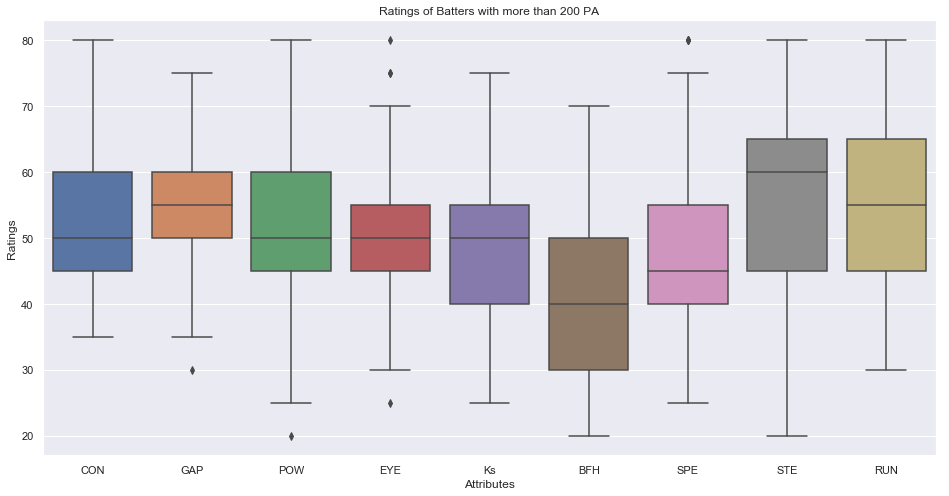

In [422]:
fig = sns.boxplot(x ="variable", y = "value", data=pd.melt(batters_all_ratbox))
plt.xlabel('Attributes')
plt.ylabel('Ratings')
plt.title('Ratings of Batters with more than 200 PA')
plt.show(fig)

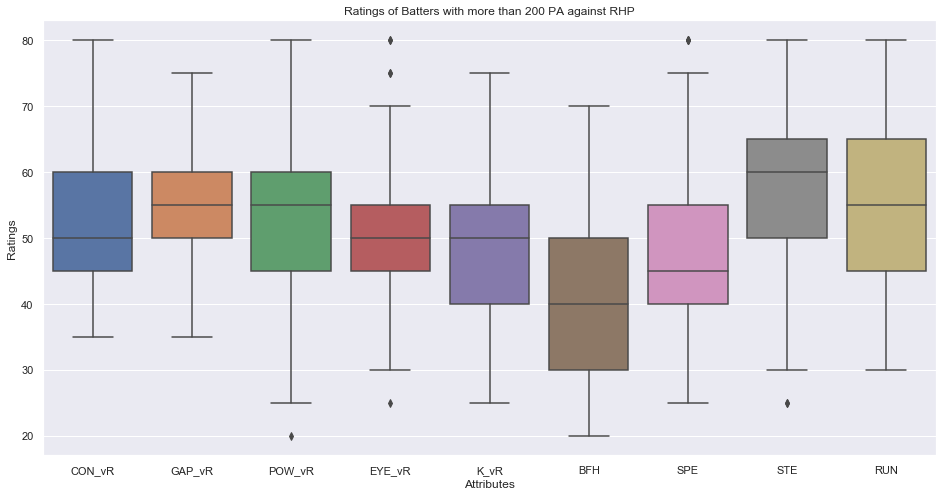

In [423]:
fig = sns.boxplot(x ="variable", y = "value", data=pd.melt(batters_rhp_ratbox))
plt.xlabel('Attributes')
plt.ylabel('Ratings')
plt.title('Ratings of Batters with more than 200 PA against RHP')
plt.show(fig)

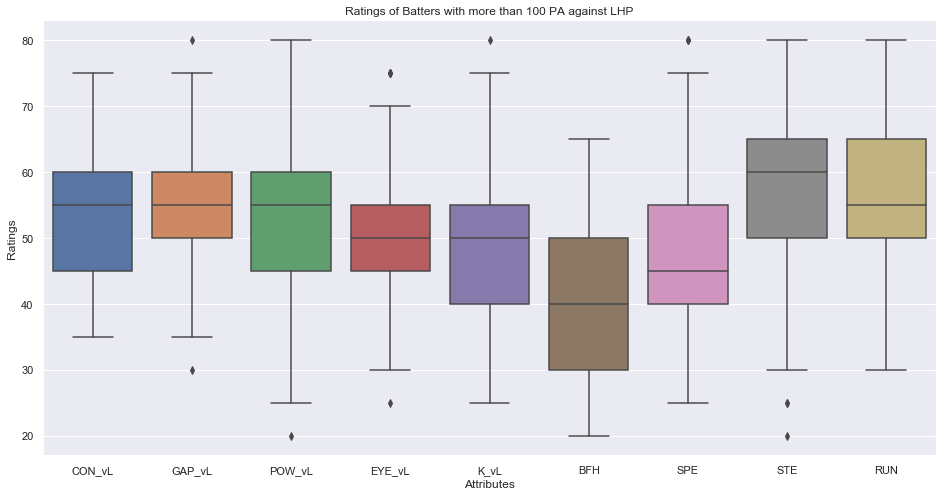

In [424]:
fig = sns.boxplot(x ="variable", y = "value", data=pd.melt(batters_lhp_ratbox))
plt.xlabel('Attributes')
plt.ylabel('Ratings')
plt.title('Ratings of Batters with more than 100 PA against LHP')
plt.show(fig)

In [490]:
batters_all_stats = batters_all.loc[:,['POS', 'First_Name', 'Last_Name', 'TM', 'AVG', 'OBP', 'SLG', 'ISO', 'BABIP']]
batters_rhp_stats = batters_rhp.loc[:,['POS', 'First_Name', 'Last_Name', 'TM', 'AVG', 'OBP', 'SLG', 'ISO', 'BABIP']]
batters_lhp_stats = batters_lhp.loc[:,['POS', 'First_Name', 'Last_Name', 'TM', 'AVG', 'OBP', 'SLG', 'ISO', 'BABIP']]

In [491]:
batters_rhp_stats = batters_rhp_stats.rename(index=str, columns={'AVG':'RAVG', 'OBP':'ROBP', 'SLG':'RSLG', 'ISO':'RISO', 'BABIP':'RBABIP'})
batters_lhp_stats = batters_lhp_stats.rename(index=str, columns={'AVG':'LAVG', 'OBP':'LOBP', 'SLG':'LSLG', 'ISO':'LISO', 'BABIP':'LBABIP'})

In [492]:
frames = [batters_all_stats, batters_rhp_stats, batters_lhp_stats]
batters_all_stats = pd.concat(frames, sort=False)

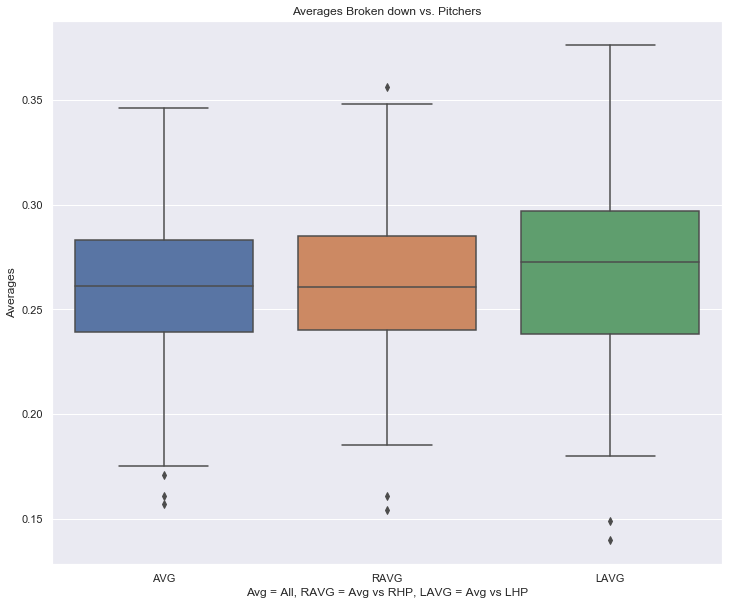

In [512]:
batters_all_statbox = batters_all_stats.loc[:,['AVG', 'RAVG', 'LAVG']]
sns.set(rc={'figure.figsize':(12,10)})
fig = sns.boxplot(x ="variable", y = "value", data=pd.melt(batters_all_statbox))
plt.xlabel('Avg = All, RAVG = Avg vs RHP, LAVG = Avg vs LHP')
plt.ylabel('Averages')
plt.title('Averages Broken down vs. Pitchers')
plt.show(fig)

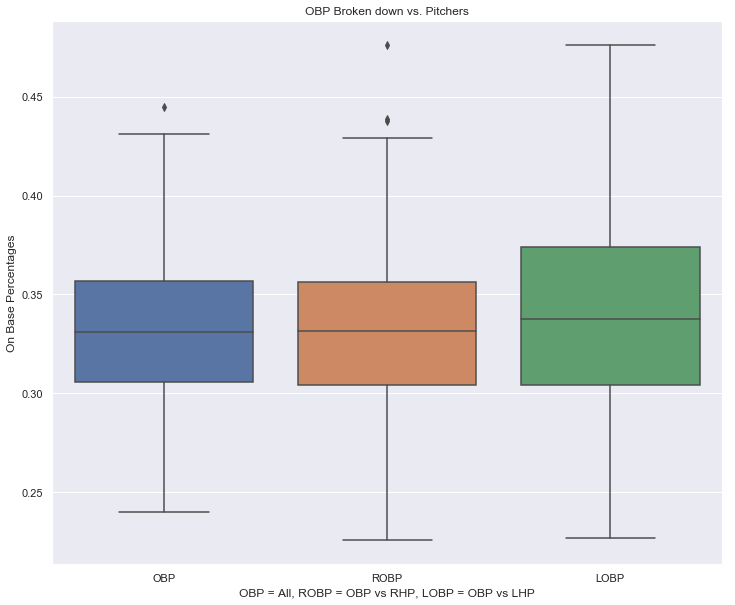

In [513]:
batters_all_statbox = batters_all_stats.loc[:,['OBP', 'ROBP', 'LOBP']]
sns.set(rc={'figure.figsize':(12,10)})
fig = sns.boxplot(x ="variable", y = "value", data=pd.melt(batters_all_statbox))
plt.xlabel('OBP = All, ROBP = OBP vs RHP, LOBP = OBP vs LHP')
plt.ylabel('On Base Percentages')
plt.title('OBP Broken down vs. Pitchers')
plt.show(fig)

### How Rare is each attribute

In [353]:
ratings = [20,25,30,35,40,45,50,55,60,65,70,75,80]
column_ratings = ['CON', 'GAP', 'POW', 'EYE', 'Ks', 'BFH', 'SPE', 'STE', 'RUN']
rarity = {}
ratings_rarity = {}

In [428]:
for col in column_ratings:
    mean = batters_all_ratbox[col].mean()
    dev = batters_all_ratbox[col].std()
    for i in ratings:
        z_score = (i-mean)/dev
        percentile = st.norm.cdf(z_score)
        ratings_rarity[i] = percentile
    rarity[col] = [ratings_rarity]

In [429]:
rarity

{'CON': [{20: 0.0006901123334344362,
   25: 0.0030366071677220023,
   30: 0.011044055965177584,
   35: 0.03333468278628477,
   40: 0.08395606432413383,
   45: 0.17774554202468418,
   50: 0.3195212250421161,
   55: 0.49438099351778697,
   60: 0.6703455678676357,
   65: 0.8148256507802724,
   70: 0.9116159517619717,
   75: 0.9645194257077533,
   80: 0.9881104232942957}],
 'GAP': [{20: 0.0006901123334344362,
   25: 0.0030366071677220023,
   30: 0.011044055965177584,
   35: 0.03333468278628477,
   40: 0.08395606432413383,
   45: 0.17774554202468418,
   50: 0.3195212250421161,
   55: 0.49438099351778697,
   60: 0.6703455678676357,
   65: 0.8148256507802724,
   70: 0.9116159517619717,
   75: 0.9645194257077533,
   80: 0.9881104232942957}],
 'POW': [{20: 0.0006901123334344362,
   25: 0.0030366071677220023,
   30: 0.011044055965177584,
   35: 0.03333468278628477,
   40: 0.08395606432413383,
   45: 0.17774554202468418,
   50: 0.3195212250421161,
   55: 0.49438099351778697,
   60: 0.670345567867

In [427]:
def percentile_calc(rating):
    mean = batters_all_ratbox[rating].mean()
    dev = batters_all_ratbox[rating].std()
    for i in ratings:
        z_score = ((i-mean)/dev)
        percentile = st.norm.cdf(z_score)
        ratings_rarity[i] = percentile
        return ratings_rarity

In [ ]:
for col in column_ratings:
    percentile_calc(col)
    rarity[col] = [ratings_rarity]